In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
X = data.drop('species', axis = 1)
y = data['species']

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
mns = MinMaxScaler()
X_scaled = mns.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [9]:
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)


# Sequential

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


2024-09-09 16:19:49.301733: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 16:19:49.303034: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-09 16:19:49.667800: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:19:49.667847: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-09 16:19:49.667869: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test,y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)

Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 0.5759 - accuracy: 0.8800

2024-09-09 16:27:09.369335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 16:27:09.411408: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:27:09.411469: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 94ms/step - loss: 0.6160 - accuracy: 0.8476 - val_loss: 0.6461 - val_accuracy: 0.8444
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6114 - accuracy: 0.8667 - val_loss: 0.6420 - val_accuracy: 0.8444
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6073 - accuracy: 0.8667 - val_loss: 0.6376 - val_accuracy: 0.8444
Epoch 4/100


2024-09-09 16:27:09.577410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 16:27:09.603387: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:27:09.603456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 28ms/step - loss: 0.6030 - accuracy: 0.8857 - val_loss: 0.6333 - val_accuracy: 0.8222
Epoch 5/100
3/3 [==============================] - 0s 28ms/step - loss: 0.5989 - accuracy: 0.8857 - val_loss: 0.6293 - val_accuracy: 0.8444
Epoch 6/100
3/3 [==============================] - 0s 28ms/step - loss: 0.5949 - accuracy: 0.8857 - val_loss: 0.6253 - val_accuracy: 0.8444
Epoch 7/100
3/3 [==============================] - 0s 31ms/step - loss: 0.5909 - accuracy: 0.8857 - val_loss: 0.6214 - val_accuracy: 0.8444
Epoch 8/100
3/3 [==============================] - 0s 29ms/step - loss: 0.5870 - accuracy: 0.8952 - val_loss: 0.6175 - val_accuracy: 0.8444
Epoch 9/100
3/3 [==============================] - 0s 27ms/step - loss: 0.5830 - accuracy: 0.8952 - val_loss: 0.6136 - val_accuracy: 0.8444
Epoch 10/100
3/3 [==============================] - 0s 29ms/step - loss: 0.5792 - accuracy: 0.8952 - val_loss: 0.6095 - val_accuracy: 0.8444
Epoch 11/100
3/3 [=============

3/3 [==============================] - 0s 24ms/step - loss: 0.4255 - accuracy: 0.9333 - val_loss: 0.4468 - val_accuracy: 0.8889
Epoch 63/100
3/3 [==============================] - 0s 26ms/step - loss: 0.4221 - accuracy: 0.9333 - val_loss: 0.4431 - val_accuracy: 0.8889
Epoch 64/100
3/3 [==============================] - 0s 24ms/step - loss: 0.4185 - accuracy: 0.9333 - val_loss: 0.4387 - val_accuracy: 0.8889
Epoch 65/100
3/3 [==============================] - 0s 26ms/step - loss: 0.4151 - accuracy: 0.9333 - val_loss: 0.4350 - val_accuracy: 0.8889
Epoch 66/100
3/3 [==============================] - 0s 24ms/step - loss: 0.4119 - accuracy: 0.9333 - val_loss: 0.4317 - val_accuracy: 0.8889
Epoch 67/100
3/3 [==============================] - 0s 25ms/step - loss: 0.4086 - accuracy: 0.9333 - val_loss: 0.4286 - val_accuracy: 0.8889
Epoch 68/100
3/3 [==============================] - 0s 25ms/step - loss: 0.4058 - accuracy: 0.9333 - val_loss: 0.4263 - val_accuracy: 0.8889
Epoch 69/100
3/3 [========

2024-09-09 16:27:16.730399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


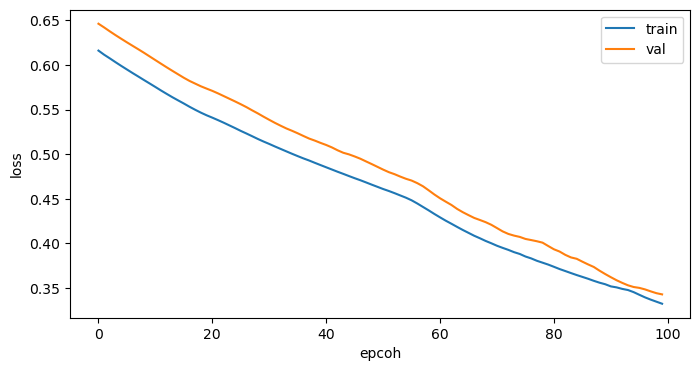

In [18]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epcoh')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 함수형


In [19]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [20]:
inputs = Input(shape=(X_train.shape[1],)) #입력층 정의 Input(shpae=(독립변수 수,))
x = Dense(32, activation='relu')(inputs) #은닉층 1번
x = Dense(64, activation='relu')(x) #은닉층 2번
x = Dense(32, activation='relu')(x) #은닉층 3번
x = Dense(16, activation='relu')(x) #은닉층 4번
x = Dense(3, activation='softmax')(x) #출력층
model = Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
Total params: 4,931
Trainable params: 4,931
Non-trainable par

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x > 0.5 else 0 )
print(classification_report(y_test, pred))

Epoch 1/100
1/3 [=========>....................] - ETA: 1s - loss: 1.1310 - accuracy: 0.2600

2024-09-09 16:47:30.183998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 16:47:30.238953: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:47:30.239022: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 100ms/step - loss: 1.1178 - accuracy: 0.3143 - val_loss: 1.0954 - val_accuracy: 0.3778
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 1.1033 - accuracy: 0.3143 - val_loss: 1.0864 - val_accuracy: 0.3778
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 1.0920 - accuracy: 0.3143 - val_loss: 1.0794 - val_accuracy: 0.5778
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 1.0841 - accuracy: 0.4200

2024-09-09 16:47:30.524156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 16:47:30.551425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:47:30.551514: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 27ms/step - loss: 1.0833 - accuracy: 0.4952 - val_loss: 1.0720 - val_accuracy: 0.6889
Epoch 5/100
3/3 [==============================] - 0s 29ms/step - loss: 1.0745 - accuracy: 0.6381 - val_loss: 1.0642 - val_accuracy: 0.6889
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 1.0648 - accuracy: 0.6571 - val_loss: 1.0555 - val_accuracy: 0.6889
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 1.0551 - accuracy: 0.6571 - val_loss: 1.0470 - val_accuracy: 0.6889
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 1.0456 - accuracy: 0.6571 - val_loss: 1.0367 - val_accuracy: 0.6889
Epoch 9/100
3/3 [==============================] - 0s 24ms/step - loss: 1.0343 - accuracy: 0.6571 - val_loss: 1.0244 - val_accuracy: 0.6889
Epoch 10/100
3/3 [==============================] - 0s 26ms/step - loss: 1.0220 - accuracy: 0.6571 - val_loss: 1.0113 - val_accuracy: 0.6889
Epoch 11/100
3/3 [=============

3/3 [==============================] - 0s 28ms/step - loss: 0.1721 - accuracy: 0.9619 - val_loss: 0.1745 - val_accuracy: 0.9556
Epoch 63/100
3/3 [==============================] - 0s 26ms/step - loss: 0.1843 - accuracy: 0.9333 - val_loss: 0.1682 - val_accuracy: 0.9111
Epoch 64/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1689 - accuracy: 0.9524 - val_loss: 0.1971 - val_accuracy: 0.9333
Epoch 65/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1645 - accuracy: 0.9619 - val_loss: 0.2636 - val_accuracy: 0.8889
Epoch 66/100
3/3 [==============================] - 0s 25ms/step - loss: 0.2062 - accuracy: 0.9333 - val_loss: 0.2658 - val_accuracy: 0.8889
Epoch 67/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1952 - accuracy: 0.9429 - val_loss: 0.1931 - val_accuracy: 0.9333
Epoch 68/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1536 - accuracy: 0.9619 - val_loss: 0.1505 - val_accuracy: 0.9333
Epoch 69/100
3/3 [========

2024-09-09 16:47:37.301408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


NameError: name 'classification_report' is not defined

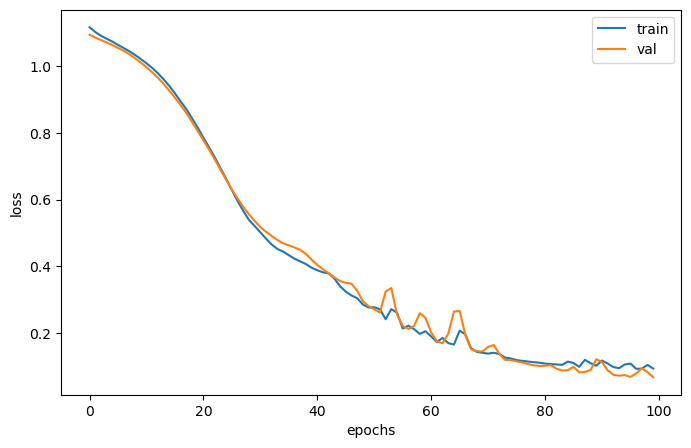

In [22]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 클래스형

In [25]:
class Iris(tf.keras.Model):
    def __init__(self):
        super(Iris, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(16, activation='relu')
        self.classifier = tf.keras.layers.Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [26]:
model = Iris()

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test,y_test))
pred=model.predict(X_test)
pred=pd.DataFrame(pred)
pred=pred[0].apply(lambda x: 1 if x > 5 else 0)
print(classification_report(y_test, pred))

Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 1.0987 - accuracy: 0.4400

2024-09-09 16:50:15.706012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 16:50:15.753726: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:50:15.753789: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 94ms/step - loss: 1.1039 - accuracy: 0.3429 - val_loss: 1.0961 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 1.0830 - accuracy: 0.4286 - val_loss: 1.0775 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 1.0629 - accuracy: 0.6762 - val_loss: 1.0607 - val_accuracy: 0.6000
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 1.0406 - accuracy: 0.7200

2024-09-09 16:50:15.916820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 16:50:15.945601: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:50:15.945675: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 29ms/step - loss: 1.0469 - accuracy: 0.6857 - val_loss: 1.0458 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 1.0295 - accuracy: 0.6571 - val_loss: 1.0314 - val_accuracy: 0.5778
Epoch 6/100
3/3 [==============================] - 0s 30ms/step - loss: 1.0130 - accuracy: 0.6571 - val_loss: 1.0177 - val_accuracy: 0.6000
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 0.9967 - accuracy: 0.6762 - val_loss: 1.0030 - val_accuracy: 0.6000
Epoch 8/100
3/3 [==============================] - 0s 28ms/step - loss: 0.9803 - accuracy: 0.6857 - val_loss: 0.9890 - val_accuracy: 0.6000
Epoch 9/100
3/3 [==============================] - 0s 29ms/step - loss: 0.9641 - accuracy: 0.6857 - val_loss: 0.9756 - val_accuracy: 0.6000
Epoch 10/100
3/3 [==============================] - 0s 30ms/step - loss: 0.9474 - accuracy: 0.6857 - val_loss: 0.9598 - val_accuracy: 0.6000
Epoch 11/100
3/3 [=============

3/3 [==============================] - 0s 25ms/step - loss: 0.2403 - accuracy: 0.9619 - val_loss: 0.2771 - val_accuracy: 0.9111
Epoch 63/100
3/3 [==============================] - 0s 26ms/step - loss: 0.2419 - accuracy: 0.9333 - val_loss: 0.2826 - val_accuracy: 0.8889
Epoch 64/100
3/3 [==============================] - 0s 26ms/step - loss: 0.2358 - accuracy: 0.9429 - val_loss: 0.2598 - val_accuracy: 0.9111
Epoch 65/100
3/3 [==============================] - 0s 28ms/step - loss: 0.2242 - accuracy: 0.9619 - val_loss: 0.2476 - val_accuracy: 0.9333
Epoch 66/100
3/3 [==============================] - 0s 30ms/step - loss: 0.2187 - accuracy: 0.9619 - val_loss: 0.2427 - val_accuracy: 0.9333
Epoch 67/100
3/3 [==============================] - 0s 31ms/step - loss: 0.2143 - accuracy: 0.9619 - val_loss: 0.2414 - val_accuracy: 0.9333
Epoch 68/100
3/3 [==============================] - 0s 25ms/step - loss: 0.2106 - accuracy: 0.9619 - val_loss: 0.2395 - val_accuracy: 0.9333
Epoch 69/100
3/3 [========

2024-09-09 16:50:22.744044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


NameError: name 'classification_report' is not defined

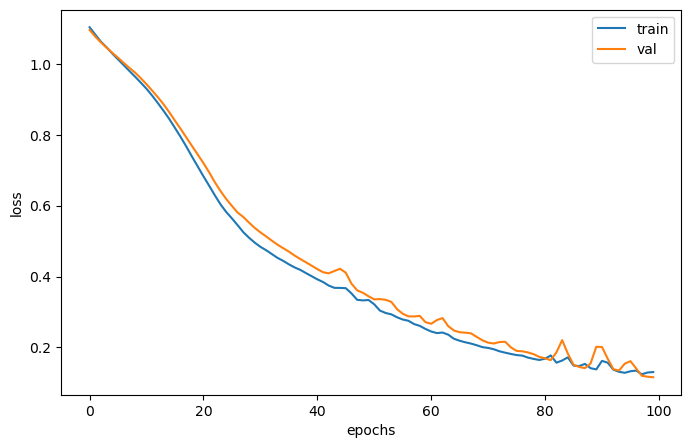

In [28]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 이진분류, 다중분류 차이점
* 출력층 뉴런 수, 활성함수 종류, loss 